

# Análisis Completo de Regresión Lineal

Este notebook muestra paso a paso cómo realizar un análisis de **Regresión Lineal** empleando un conjunto de datos que contiene:
- **valuationdate**: fecha de valoración (opcional para el modelo)
- **revenues**: ingresos
- **ebit**: utilidad antes de intereses e impuestos
- **depreciation**: depreciación
- **capex**: gastos de capital
- **ncwc**: cambio en capital de trabajo neto
- **bv**: (posiblemente) valor en libros
- **y**: variable objetivo que deseamos predecir (por ejemplo, un valor financiero o de valoración)

Iremos desde la **carga** y **exploración** del dataset hasta la **interpretación** de coeficientes y la **evaluación** de métricas importantes.

In [ ]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv

--2025-09-24 21:27:47--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv [following]
--2025-09-24 21:27:47--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82415 (80K) [text/plain]
Saving to: ‘enterprise.csv.1’

enterprise.csv.1    100%[============

## Paso 0: Importar librerías y configuración

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Paso 1: Carga y Exploración de Datos (EDA)

En este primer bloque, cargaremos nuestro dataset y realizaremos un Análisis Exploratorio básico.

In [ ]:
df = pd.read_csv('enterprise.csv')

display(df.head())

,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,91760.80000
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,184461.70000
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,23323.68520
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,130202.79240
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,11472.12267


### Estadísticas Descriptivas y Distribuciones

In [ ]:
df.describe()

,revenues,ebit,depreciation,capex,ncwc,bv,y
count,1.061000e+03,1061.000000,1061.000000,1061.000000,1061.000000,1.061000e+03,1.061000e+03
mean,1.632727e+05,24076.406810,8002.050367,10961.602205,22324.130946,8.057162e+04,3.292238e+05
std,2.213828e+05,31871.076559,13898.135849,20250.735197,54636.421540,1.043500e+05,4.056701e+05
min,8.560000e+01,-29982.979880,-5.690000,-694.661000,-118819.899000,-1.503965e+04,3.692000e+02
25%,4.265958e+04,4522.900000,999.340000,1666.600000,3115.247000,1.689500e+04,6.981010e+04
50%,1.082011e+05,12224.611950,3446.250000,4949.447000,10736.200000,4.172290e+04,1.850416e+05
75%,1.862485e+05,32228.941870,8361.220000,11201.479000,23454.185000,1.147563e+05,4.258273e+05
max,2.586712e+06,289541.300000,128993.500000,205525.700000,623588.700000,1.009026e+06,4.175892e+06


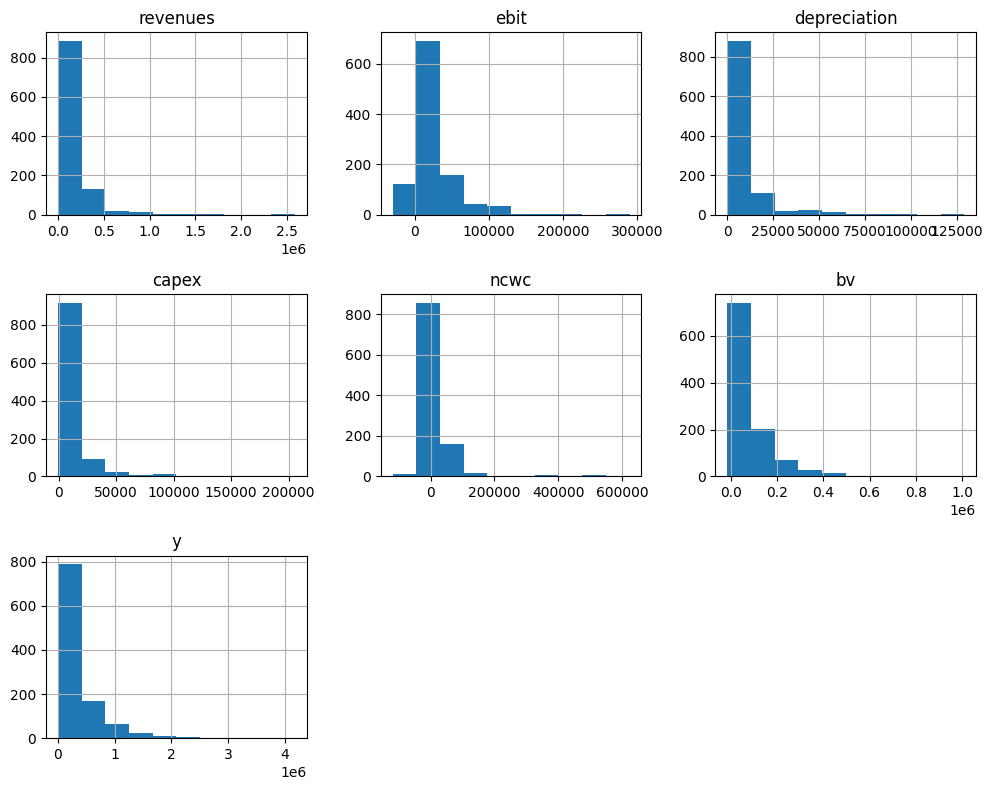

In [ ]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### Preguntas de Reflexión (Exploración)
1. ¿Qué tipo de problema estás intentando resolver al usar `y` como variable objetivo?
2. ¿Notas valores atípicos (outliers) en alguna de las variables? ¿Cómo podría afectar a la regresión lineal?
3. ¿Crees que la columna `valuationdate` podría aportar información para predecir `y`, o la excluirías del análisis?

_Responde con tu razonamiento propio aquí._

1. Al usar Y como variable objetivo se quiere resolver un problema de regresion, prediciendo el valor con las demas variables
2. Si, hay varios valores atipicos que podrian alterar el modelo ya que los resultados serian menos precisos
3. teniendo en cuenta que solo son gfecha, no creo que agregue mucho valor al modelo de preciccion, entonces yo la excluiria

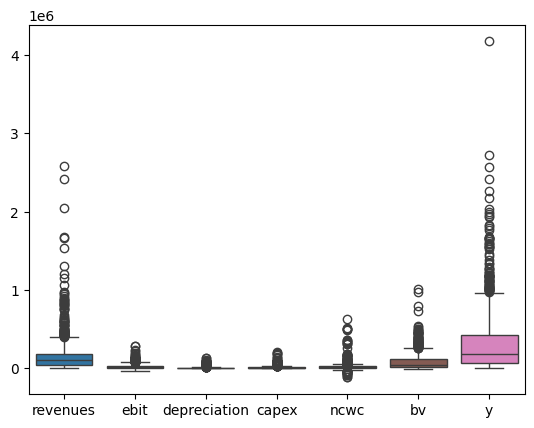

In [ ]:
sns.boxplot(data=df)
plt.show()

## Paso 2: Preparación y Limpieza de Datos

1. **Manejo de valores faltantes**.
2. **Posible eliminación** o **imputación** de outliers.
3. **Transformaciones** (escalado, log, etc.) si son necesarias.

In [ ]:
print("Valores Faltantes por Columna:")
display(df.isnull().sum())

Valores Faltantes por Columna:


,0
valuationdate,0
revenues,0
ebit,0
depreciation,0
capex,0
ncwc,0
bv,0
y,0


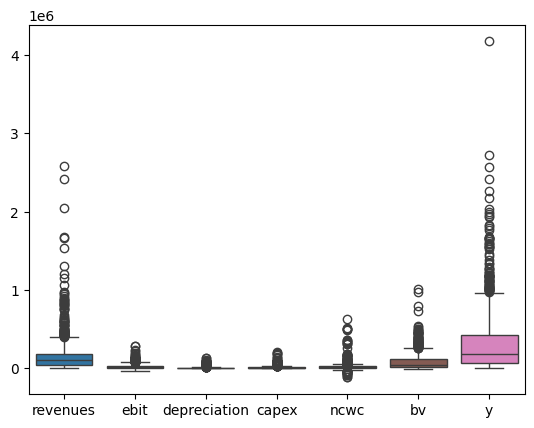

In [ ]:

sns.boxplot(data=df)
plt.show()

,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y,revenues_log,ebit_log,depreciation_log,capex_log,ncwc_log,bv_log
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,91760.80000,11.366594,10.605904,8.769770,8.344900,11.817987,11.050680
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,184461.70000,11.346524,10.692312,9.067196,9.790832,11.782319,11.312595
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,23323.68520,9.653094,10.315807,6.484527,7.276653,11.697663,10.133423
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,130202.79240,11.033562,10.533076,7.504678,8.131387,11.780623,10.649857
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,11472.12267,7.055511,10.324896,5.479459,7.718494,11.686642,9.711400


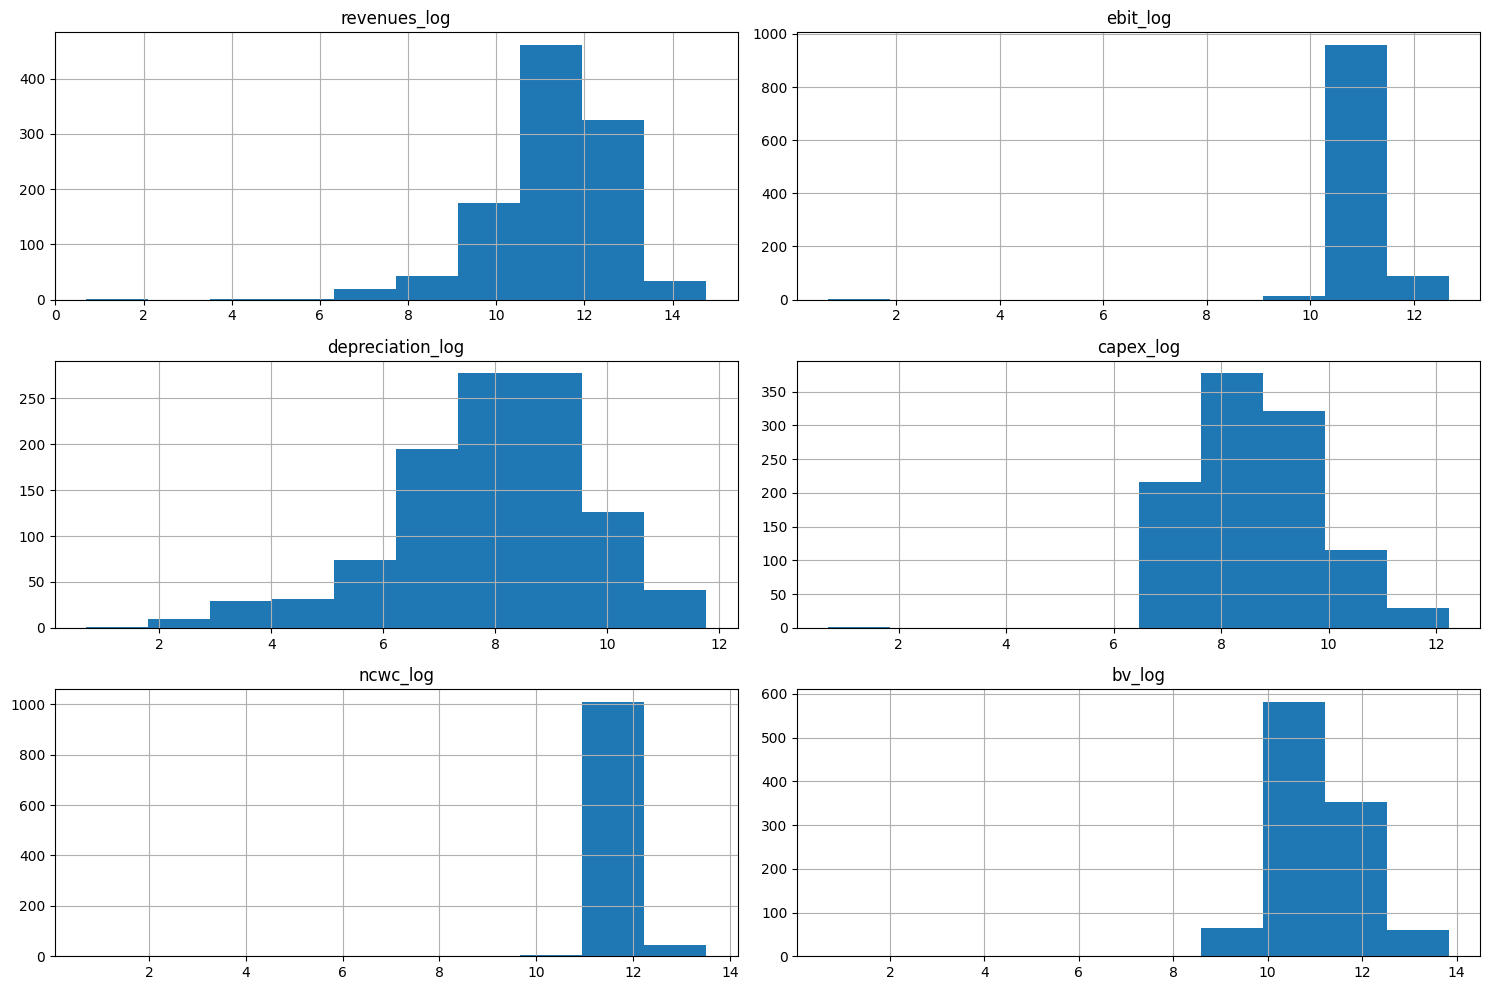

In [ ]:
for col in ['revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv']:

    df[col + '_log'] = np.log1p(df[col] - df[col].min() + 1)


display(df.head())

df[['revenues_log', 'ebit_log', 'depreciation_log', 'capex_log', 'ncwc_log', 'bv_log']].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

### Pregunta de Reflexión (Limpieza)
¿Por qué es relevante tratar valores faltantes y/o outliers **antes** de entrenar el modelo de regresión lineal?

_Responde con tu razonamiento aquí._

- Valores Faltantes: Porque el modelo no acepta conceptos nulos y si se eliminan quedaria con menos datos para el aprendizaje del modelo
- Outliers: Porque un outlier con valor muy grande genera un error desproporcionado que puede arrastrar la recta hacia él.

## Paso 4: Selección de Variables e Implementación del Modelo

1. **Seleccionar** cuáles columnas usarás como variables explicativas (features). Puede que uses todas o hagas una selección.
2. **Asignar** `X` (features) y `y` (variable objetivo).
3. **Dividir** en conjunto de entrenamiento (train) y conjunto de prueba (test).

In [ ]:
X = df[features]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

Entrenamiento: 848 muestras
Prueba: 213 muestras


### Preguntas de Reflexión (Selección de Variables)
1. ¿Por qué es importante separar los datos en train y test?
2. ¿Qué pasaría si entrenas y evalúas en el **mismo** conjunto de datos?

_Responde con tu razonamiento._

1. Es importante separar los datos ya que con la parte del Train el modelo aprende y con la parte de Test es como vamos a comprobar si e modelo lo aprendio adecuadamente y lo esta haciendo bien
2. No podriamos evaluar el modelo y comprobar si realmente aprendio ya que el conoce la respuesta de esos datos y simplemente estaria como memorizando no aprendiendo que es lo que necesitamos

## Paso 5: Entrenar el Modelo de Regresión Lineal
Usaremos la clase `LinearRegression` de scikit-learn.

In [ ]:
# Crear instancia del modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
intercept = model.intercept_
coef = model.coef_[0]

print(f"Intercept (beta_0): {intercept:.2f}")
print(f"Coeficiente (beta_1): {coef:.2f}")

Intercept (beta_0): -4668081.45
Coeficiente (beta_1): 14242.90


### Interpretación de Coeficientes
Si la lista de features es `["revenues", "ebit", "depreciation", "capex", "ncwc", "bv"]` y tu `model.coef_` es algo como `[a, b, c, d, e, f]`, entonces:

\[ y \approx \beta_0 + a\cdot revenues + b\cdot ebit + c\cdot depreciation + d\cdot capex + e\cdot ncwc + f\cdot bv \]

Cada coeficiente indica cómo cambia `y` en promedio **por cada unidad** que se incrementa la variable (manteniendo las demás constantes).

## Paso 6: Evaluación y Validación del Modelo
Usaremos las siguientes métricas:
- **MSE (Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Coeficiente de Determinación)**

### Preguntas de Reflexión (Evaluación)
1. ¿Por qué comparamos las métricas en **Entrenamiento** vs **Prueba**?
2. ¿Qué significa si el error en entrenamiento es **muy** distinto (mucho menor o mucho mayor) que en prueba?
3. ¿Cómo interpretar un **R²** cercano a 1, cercano a 0 o incluso negativo?

_Responde con tu razonamiento._

1. Se comparan las metricas para comprobar que el modelo si haya aprendido y no haya solo "Memorizado" los datos de el entrenamiento
2. Si el error en train es mucho menor que en test, el modelo se aprendió de memoria los datos y falla en nuevos. Pero si el error en train es mucho mayor que en test, el modelo no aprendió casi nada. Aunque si los errores son parecidos, el modelo está aprendiendo bien y generaliza.
3. Cuando el R² es cercano al 1 significa que explica muy bien la variabilidad. Cuando es cercano a 0 o negativo, significa que no explica la variable o que peor que un modelo de deduccion trivial

### Pregunta de Reflexión (Residuos)
Si observas un patrón claro en la gráfica de residuos (por ejemplo, forma de U), ¿qué podría indicar respecto a las **asunciones** de la regresión lineal?

_Responde con tu razonamiento._

Si al graficar los residuos vemos una especie de U, eso quiere decir que la relación entre las variables no es realmente lineal. Lo que quiere decir que la recta del modelo no está captando bien la forma de los datos, que más bien siguen una curva

## Paso 8: Interpretación y Conclusiones

1. **Revisa** los coeficientes: ¿son consistentes con la lógica de negocio? (p.ej., si `ebit` aumenta, esperas que `y` aumente o disminuya?).
2. **Observa** el nivel de error y R²: ¿el modelo es suficientemente bueno para su uso práctico?
3. **Considera** la posibilidad de:
   - Añadir más variables.
   - Aplicar **regresiones polinómicas** (X², X³) si sospechas no linealidad.
   - Usar **regularización** (Ridge, Lasso) si hay multicolinealidad o se requieren coeficientes más estables.

### Preguntas de Reflexión Final
1. ¿Crees que la Regresión Lineal Simple/Múltiple **captura adecuadamente** las relaciones en tus datos?
2. ¿Qué otras técnicas (ej. árboles de decisión, bosques aleatorios, etc.) considerarías para comparar resultados?
3. ¿El dataset es suficientemente grande y variado para hacer conclusiones robustas?

_Responde con tu razonamiento._

1. Siento que la regresión lineal sí logra explicar parte de la relación entre las variables, pero no del todo. Si aparecen patrones en los residuos, eso me dice que el modelo no está captando toda la forma real de los datos. Es útil como primer paso, pero no necesariamente el mejor modelo en todos los casos.
2. Yo buscasria otros modelos que permitan adaptarse mejor a relaciones que no sean tan lineales y podrían mejorar la precisión de las predicciones.
3. Si considero que el tamaño y la variedad del dataset son claves. Si los datos son pocos o muy parecidos, es difícil sacar conclusiones sólidas. Entre más grande y diverso sea el conjunto, más confianza se puede tener en lo que el modelo está mostrando.

## Resumen
En este Notebook hemos:
1. **Explorado** los datos (EDA) y detectado posibles outliers.
2. **Limpieza** de datos y transformaciones opcionales.
3. **Seleccionado** variables y dividido en train/test.
4. **Entrenado** un modelo de Regresión Lineal.
5. **Evaluado** con MSE, MAE, R² y analizado residuos.
6. **Reflexionado** sobre los coeficientes y conclusiones.

¡Has completado un **análisis de regresión lineal** de forma integral! Para afianzar, puedes:
- Ajustar parámetros (aunque la regresión lineal simple en sklearn no tiene muchos).
- Comparar con otros modelos.
- Realizar validación cruzada en lugar de una simple división train/test.

¡Éxitos en tu proyecto de análisis!